In [62]:
import meep as mp
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Video
from meep.materials import Si
%matplotlib notebook

In [63]:
resolution = 20   # pixels/um

eps = 13          # dielectric constant of waveguide
w = 1.2           # width of waveguide
d = 1.4           # defect spacing (ordinary spacing = 1)
N = 0

sx = 8            # size of cell in x direction
sy = 8            # size of cell in y direction (perpendicular to wvg.)
pad = 2           # padding between last hole and PML edge
dpml = 1          # PML thickness

In [64]:
cell = mp.Vector3(sx,sy,0)

geometry = [mp.Block(center=mp.Vector3(2,0,0), size=mp.Vector3(2,w,mp.inf), material=Si),
            mp.Block(center=mp.Vector3(0,0,0), size=mp.Vector3(2,w,mp.inf), material=Si),
            mp.Block(center=mp.Vector3(-2,0,0), size=mp.Vector3(2,w,mp.inf), material=Si)]

pml_layers = [mp.PML(1.0)]

In [65]:
fcen = 0.25   # pulse center frequency
df = 0.2       # pulse frequency width

src = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                 component=mp.Ey,
                 center=mp.Vector3(-0.5*sx+dpml,0),
                 size=mp.Vector3(0,w))]

sym = [mp.Mirror(mp.Y, phase=-1)]

In [66]:
sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    symmetries=sym,
                    resolution=resolution)

In [67]:
freg = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml-0.5),
                     size=mp.Vector3(0,2*w))

nfreq = 500 # number of frequencies at which to compute flux

# transmitted flux
trans = sim.add_flux(fcen, df, nfreq, freg)

<IPython.core.display.Javascript object>


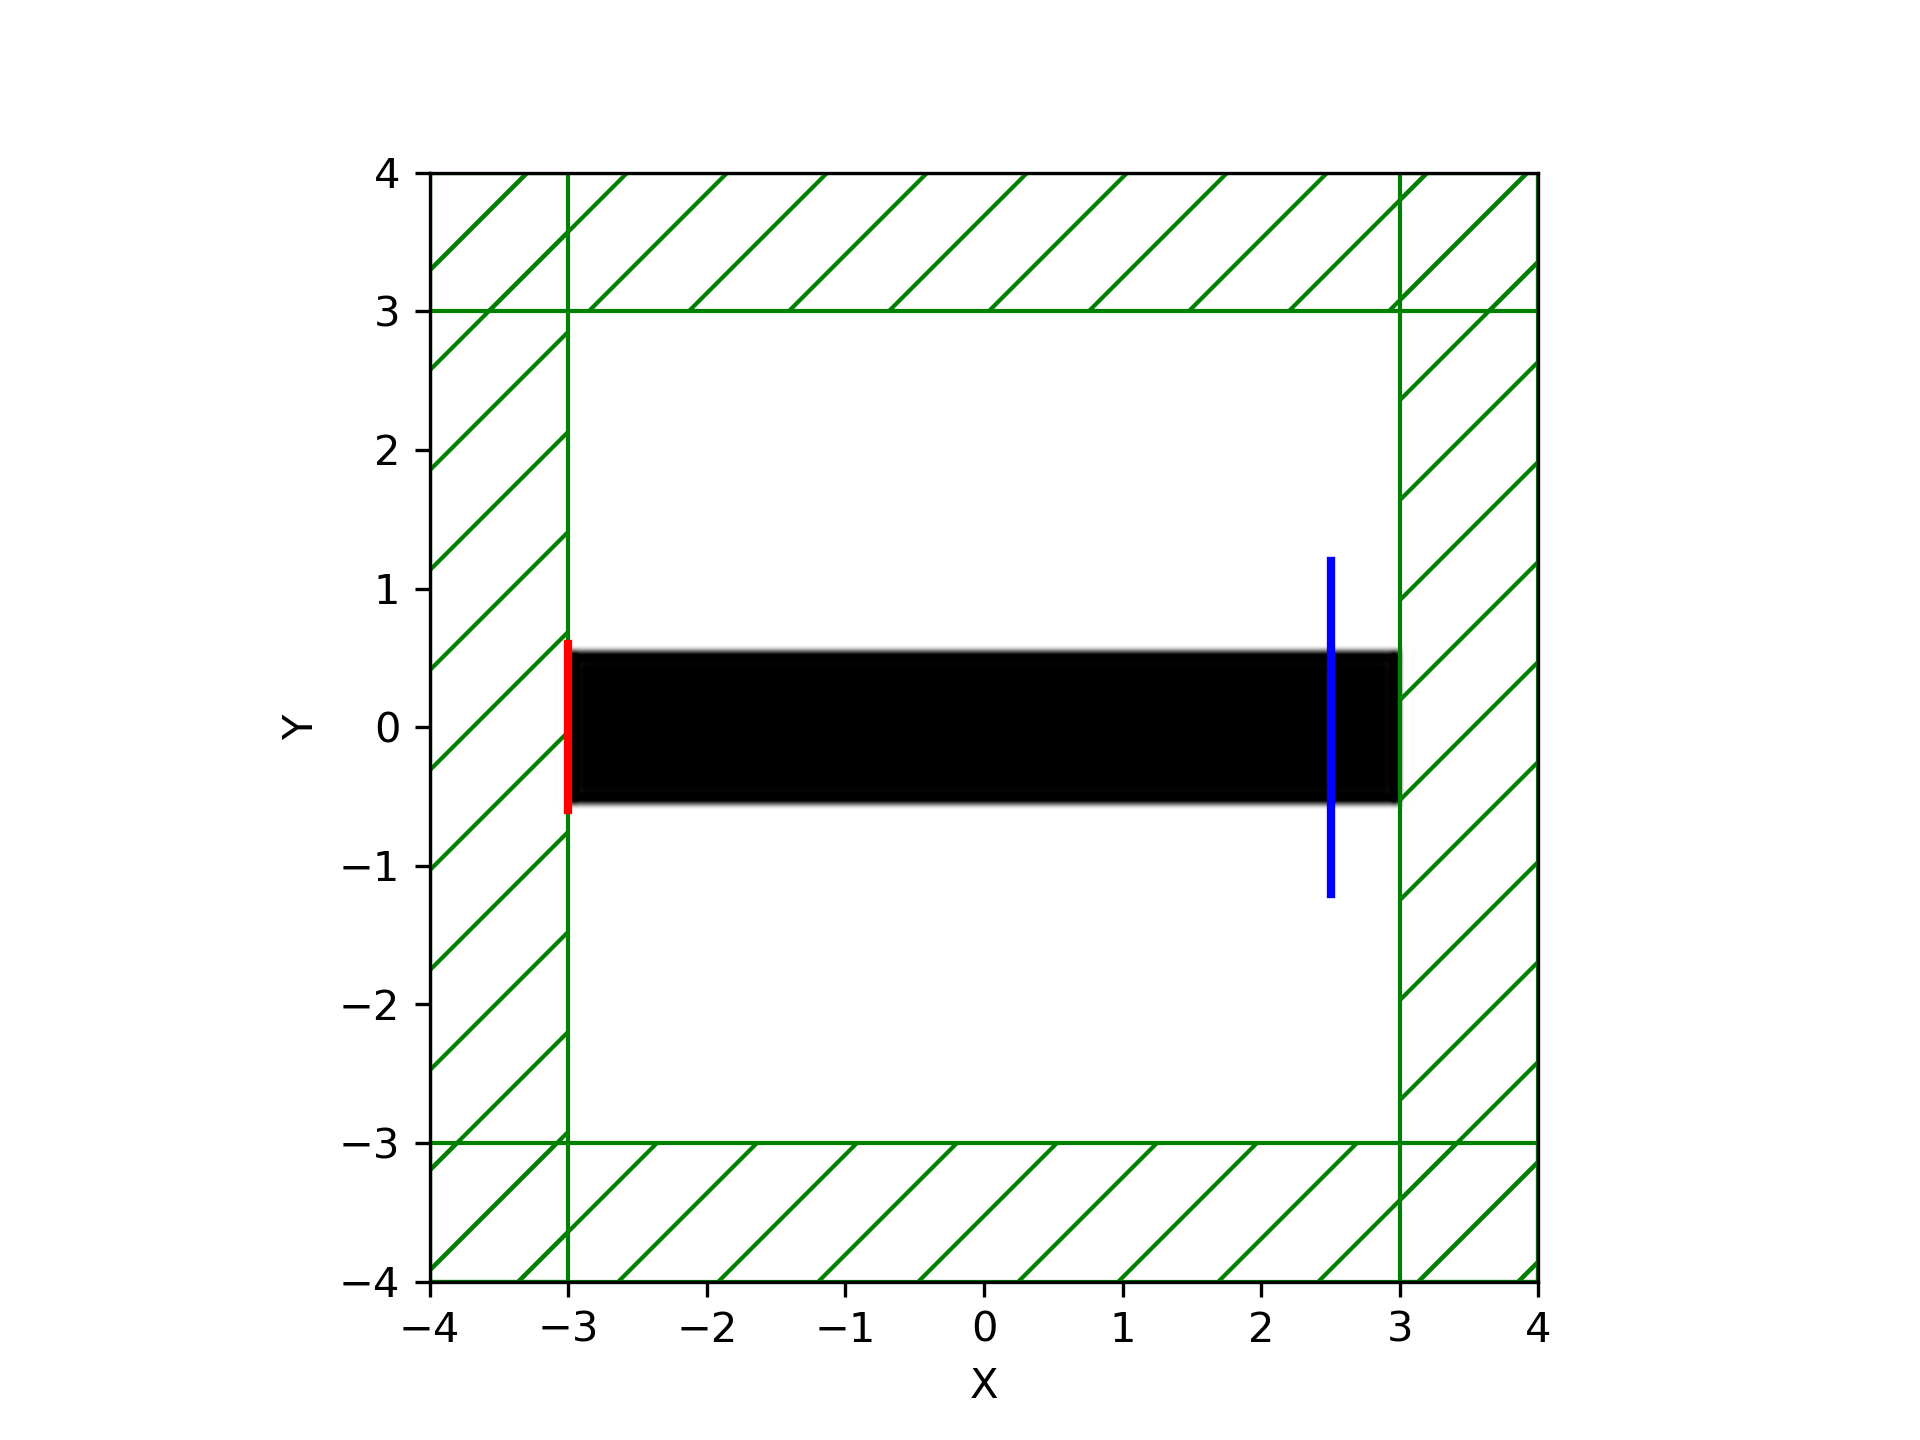

-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00140595 s
Working in 2D dimensions.
Computational cell is 8 x 8 x 0 with resolution 20
     block, center = (2,0,0)
          size (2,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (2,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (-2,0,0)
          size (2,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0245271 s
lorentzian susceptibility: frequency=0.000905797, gamma=0
lorentzian susceptibility: frequency=0.88125, gamma=0
lorentzian susceptibility: frequency=3.31657, gamma=0
-----------


In [68]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.show()

In [70]:
f = plt.figure(dpi=150)
animate = mp.Animate2D(sim,f=f,fields=mp.Hz,realtime=False,normalize=True)

sim.run(mp.during_sources(mp.at_every(0.4, animate)),
            until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(0.5*sx-dpml-0.5), 1e-3))
plt.close()

<IPython.core.display.Javascript object>

on time step 486 (time=12.15), 3.84488 s/step


RuntimeError: meep: simulation fields are NaN or Inf

In [59]:
filename = 'media/hole-wvg-cavity.mp4'
animate.to_mp4(10,filename)
Video(filename)

Generating MP4...


In [60]:
def sim_cavity(N=3,sy=6):
    sx = 2*(pad+dpml+N)+d  # size of cell in x direction
    cell = mp.Vector3(sx,sy,0)
    geometry = [mp.Block(center=mp.Vector3(-2,0,0), size=mp.Vector3(4,w,mp.inf), material=mp.air),
                mp.Block(center=mp.Vector3(2,0,0), size=mp.Vector3(4,w,mp.inf), material=Si)]

    for i in range(N):
            geometry.append(mp.Cylinder(r, center=mp.Vector3(d/2+i)))
            geometry.append(mp.Cylinder(r, center=mp.Vector3(-(d/2+i))))
    
    src = [mp.Source(mp.GaussianSource(fcen, fwidth=df),
                 component=mp.Ey,
                 center=mp.Vector3(-0.5*sx+dpml),
                 size=mp.Vector3(0,w))]
    
    sim = mp.Simulation(cell_size=cell,
                    geometry=geometry,
                    boundary_layers=pml_layers,
                    sources=src,
                    resolution=resolution)
    
    freg = mp.FluxRegion(center=mp.Vector3(0.5*sx-dpml-0.5),
                     size=mp.Vector3(0,2*w))
    nfreq = 500
    trans = sim.add_flux(fcen, df, nfreq, freg)
    
    sim.run(until_after_sources=mp.stop_when_fields_decayed(50, mp.Ey, mp.Vector3(0.5*sx-dpml-0.5), 1e-3))
    
    freqs = mp.get_flux_freqs(trans)
    psd = mp.get_fluxes(trans)

    return freqs, psd

In [61]:
freqs_wg, psd_wg = sim_cavity(N=0) # simple waveguide
freqs_cav, psd_cav = sim_cavity() # cavity

-----------
Initializing structure...
time for choose_chunkdivision = 0.000254869 s
Working in 2D dimensions.
Computational cell is 7.4 x 6 x 0 with resolution 20
     block, center = (-2,0,0)
          size (4,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2,0,0)
          size (4,1.2,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.0352371 s
lorentzian susceptibility: frequency=0.000905797, gamma=0
lorentzian susceptibility: frequency=0.88125, gamma=0
lorentzian susceptibility: frequency=3.31657, gamma=0
-----------


RuntimeError: meep: simulation fields are NaN or Inf

<IPython.core.display.Javascript object>


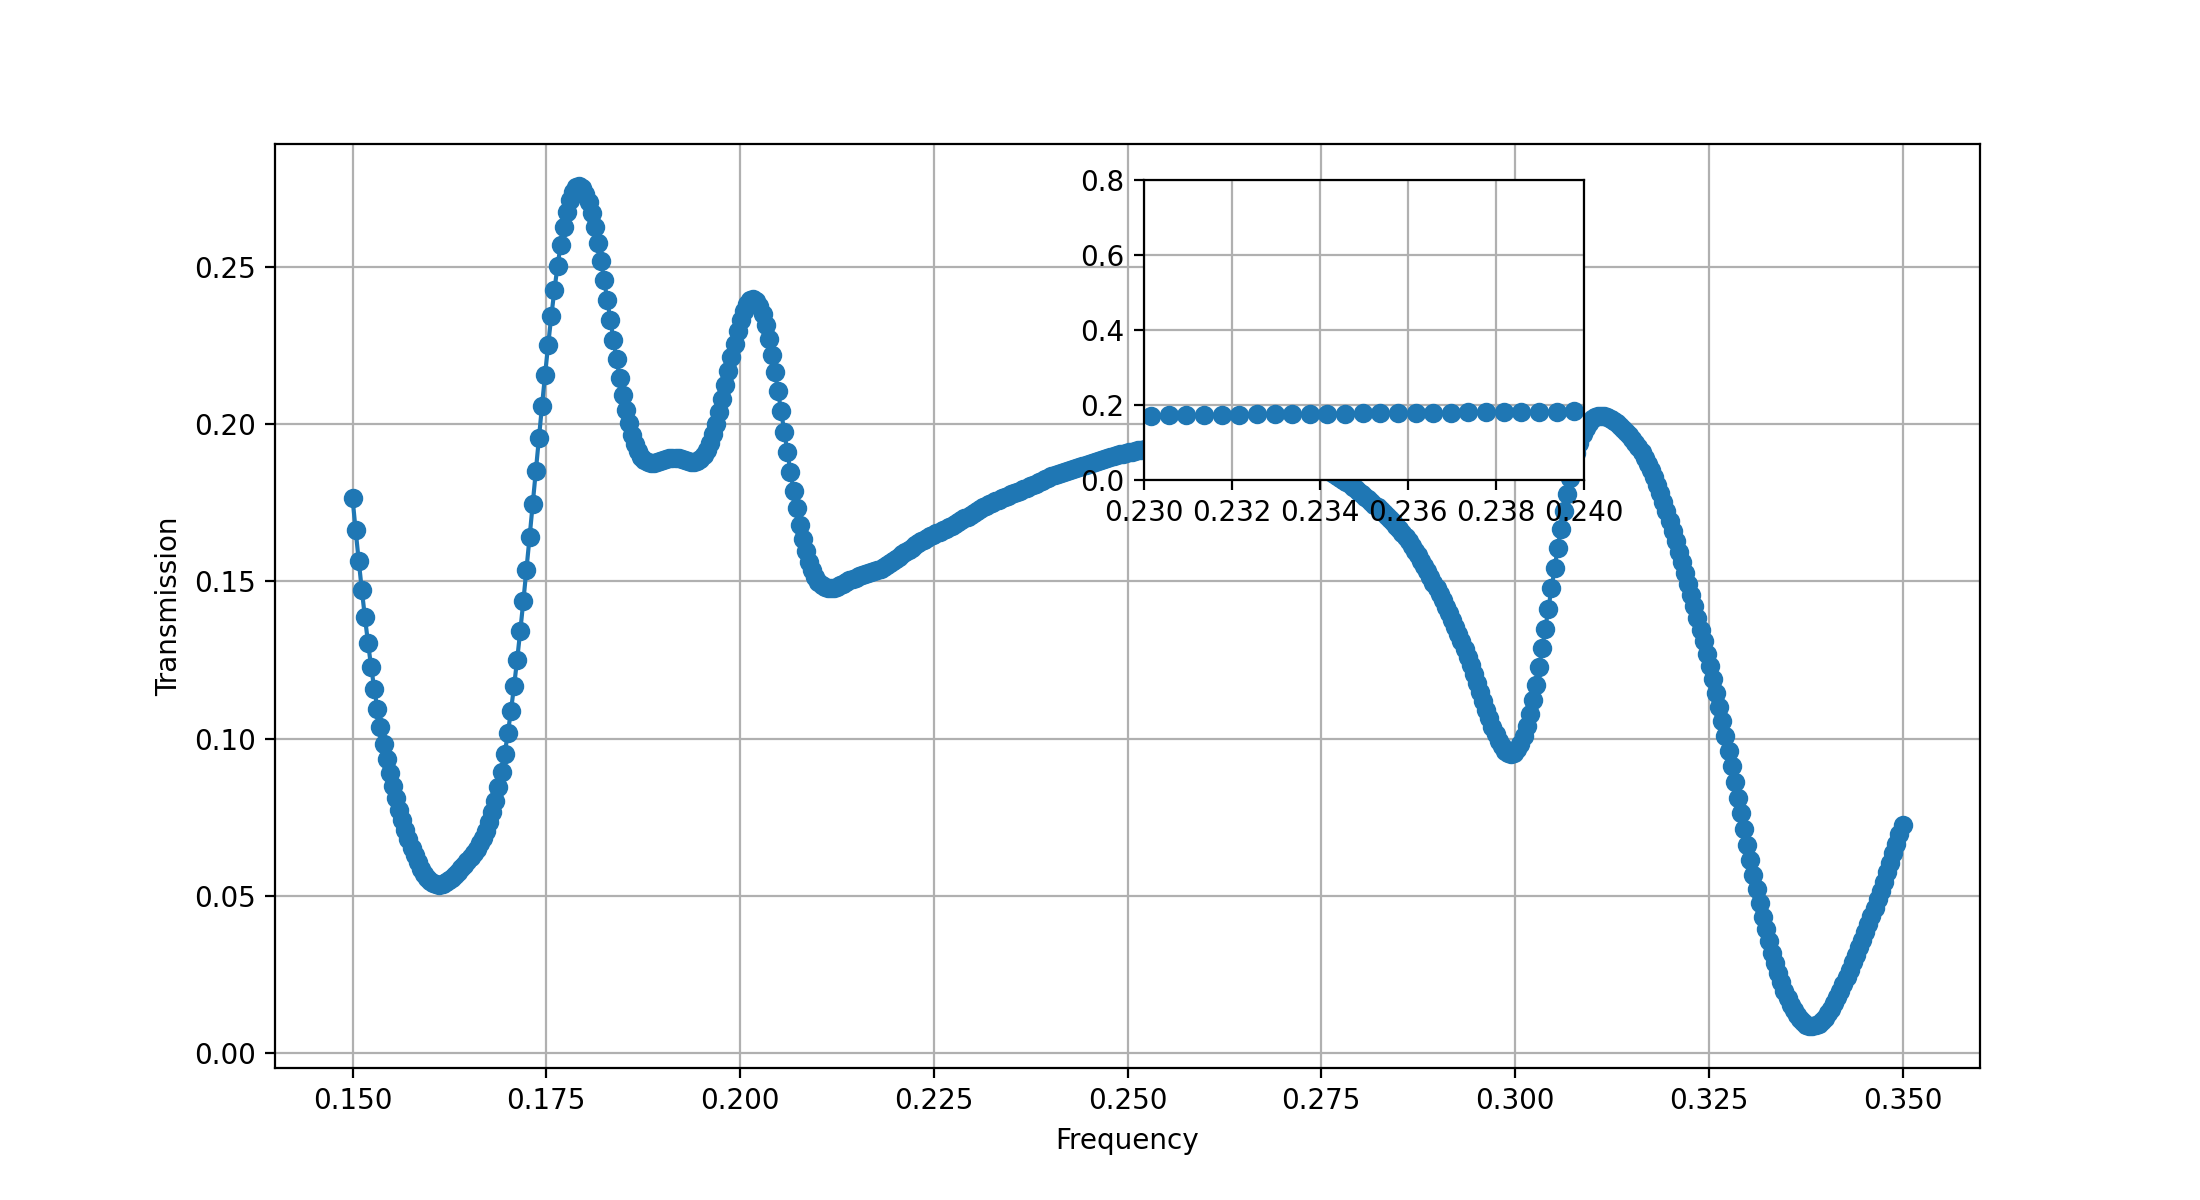

In [96]:
fig = plt.figure(figsize=(11,6),dpi=100)
ax = fig.add_subplot(111)
plt.plot(freqs_cav,np.array(psd_cav)/np.array(psd_wg),'o-')
plt.grid(True)
plt.xlabel('Frequency')
plt.ylabel('Transmission')

ax2 = fig.add_axes([0.52, 0.6, 0.2, 0.25])
plt.plot(freqs_cav,np.array(psd_cav)/np.array(psd_wg),'o-')
plt.xlim(0.23,0.24)
plt.ylim(0,0.8)
plt.grid(True)